<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/trial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SECTION 2: Install all required libraries
!pip install pandas numpy matplotlib seaborn plotly scikit-learn \
             dask statsmodels prophet xgboost \
             torch torchvision torchaudio \
             geopandas folium --quiet

# SECTION 2.1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX

import dask.dataframe as dd
import geopandas as gpd
import folium

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO

import warnings
warnings.filterwarnings("ignore")

# Set aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.6 MB/s eta 0:00:00


In [ ]:
# SECTION 3: Load dataset with simulated turbine readings
df = pd.read_csv("/content/mechanical_timeseries_dataset (2).csv", parse_dates=["timestamp"])
df.sort_values("timestamp", inplace=True)
df.reset_index(drop=True, inplace=True)

print("DataFrame shape:", df.shape)
df.head()


DataFrame shape: (2160, 10)


,timestamp,engine_temp_C,vibration_level_g,rotational_speed_rpm,pressure_psi,ambient_temp_C,component_wear_mm,location_lat,location_lon,anomaly_flag
0,2023-01-01 00:00:00,82.483571,0.144427,1496.025273,106.932176,29.851135,-0.056781,35.391170,-117.882741,0
1,2023-01-01 01:00:00,79.308678,0.212325,1478.547047,79.723227,22.688726,0.053570,35.408199,-117.976887,0
2,2023-01-01 02:00:00,83.238443,0.224911,1744.056579,91.139598,28.430085,0.033641,35.365397,-116.601722,0
3,2023-01-01 03:00:00,87.615149,0.257007,1284.664175,96.674206,25.554576,0.011338,34.785615,-117.441425,0
4,2023-01-01 04:00:00,78.829233,0.279027,1347.496152,107.031402,25.756585,0.102317,34.789707,-117.331842,0


In [ ]:
# Basic structure and health of dataset
print("🧾 Dataset Shape:", df.shape)
print("\n📋 Data Types and Nulls:")
print(df.info())

print("\n🔍 Missing values per column:")
print(df.isnull().sum())

print("\n📈 Basic Descriptive Stats:")
df.describe()


🧾 Dataset Shape: (2160, 10)

📋 Data Types and Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             2160 non-null   datetime64[ns]
 1   engine_temp_C         2160 non-null   float64       
 2   vibration_level_g     2160 non-null   float64       
 3   rotational_speed_rpm  2160 non-null   float64       
 4   pressure_psi          2160 non-null   float64       
 5   ambient_temp_C        2160 non-null   float64       
 6   component_wear_mm     2160 non-null   float64       
 7   location_lat          2160 non-null   float64       
 8   location_lon          2160 non-null   float64       
 9   anomaly_flag          2160 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 168.9 KB
None

🔍 Missing values per column:
timestamp               0
engine_temp_

,timestamp,engine_temp_C,vibration_level_g,rotational_speed_rpm,pressure_psi,ambient_temp_C,component_wear_mm,location_lat,location_lon,anomaly_flag
count,2160,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,2023-02-14 23:29:59.999999744,80.178492,0.199173,1493.084918,100.054307,24.972340,2.499136,35.022571,-116.979388,0.025000
min,2023-01-01 00:00:00,63.793663,0.049618,864.659237,61.633445,13.232799,-0.106413,34.000505,-117.998777,0.000000
25%,2023-01-23 11:45:00,76.885951,0.164399,1362.778580,92.880063,23.015423,1.245139,34.544128,-117.458687,0.000000
50%,2023-02-14 23:30:00,80.142658,0.199352,1494.824508,99.879796,25.009763,2.486679,35.045984,-116.988335,0.000000
75%,2023-03-09 11:15:00,83.364706,0.232531,1630.934846,107.148528,26.929658,3.736707,35.494452,-116.480991,0.000000
max,2023-03-31 23:00:00,99.263657,0.396312,2122.582040,135.290552,34.473314,5.195562,35.998299,-116.000257,1.000000
std,NaN,4.931609,0.050440,199.397219,10.479036,2.912889,1.448866,0.566358,0.578171,0.156161


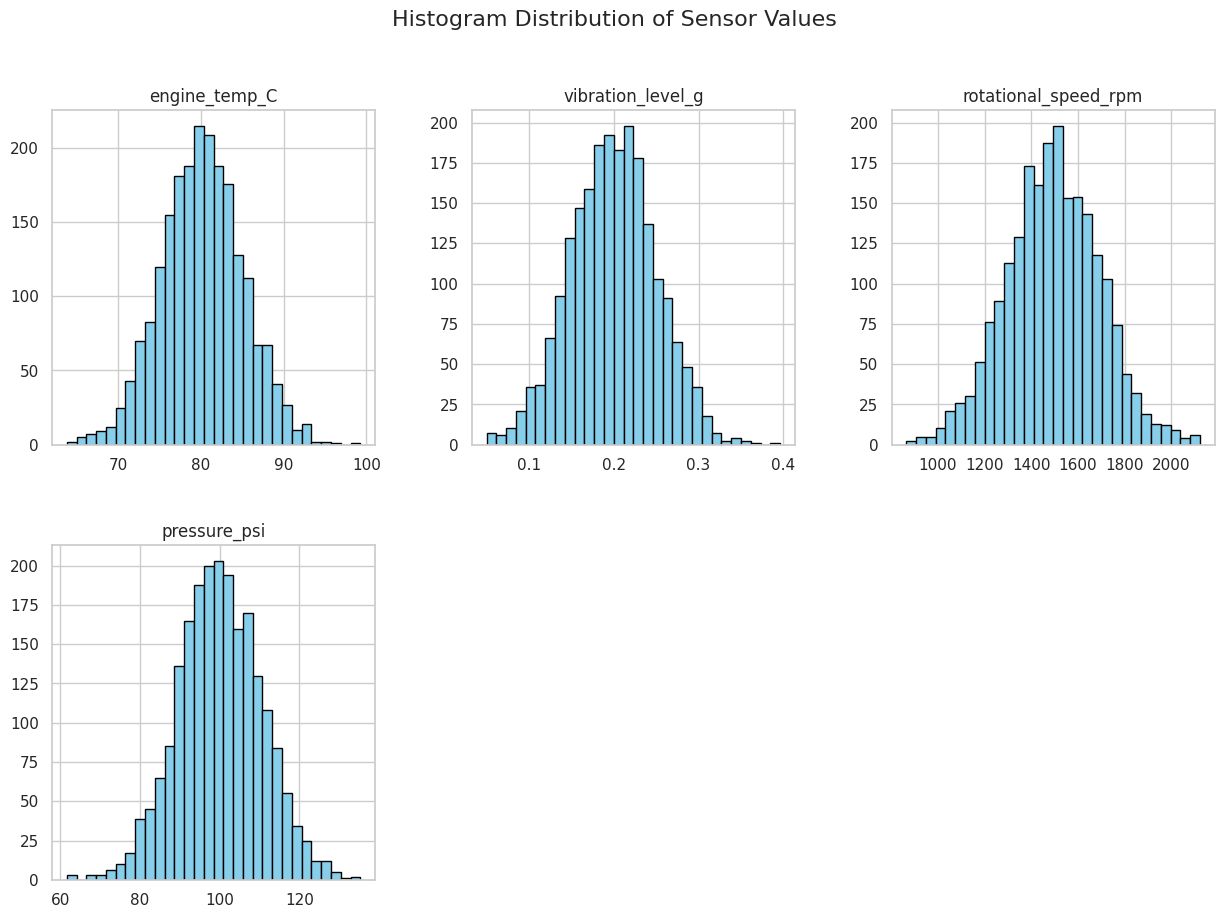

In [ ]:
# Plot histograms for each sensor
sensor_cols = ["engine_temp_C", "vibration_level_g", "rotational_speed_rpm", "pressure_psi"]  # Corrected column name
df[sensor_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3), color="skyblue", edgecolor="black")
plt.suptitle("Histogram Distribution of Sensor Values", fontsize=16)
plt.show()

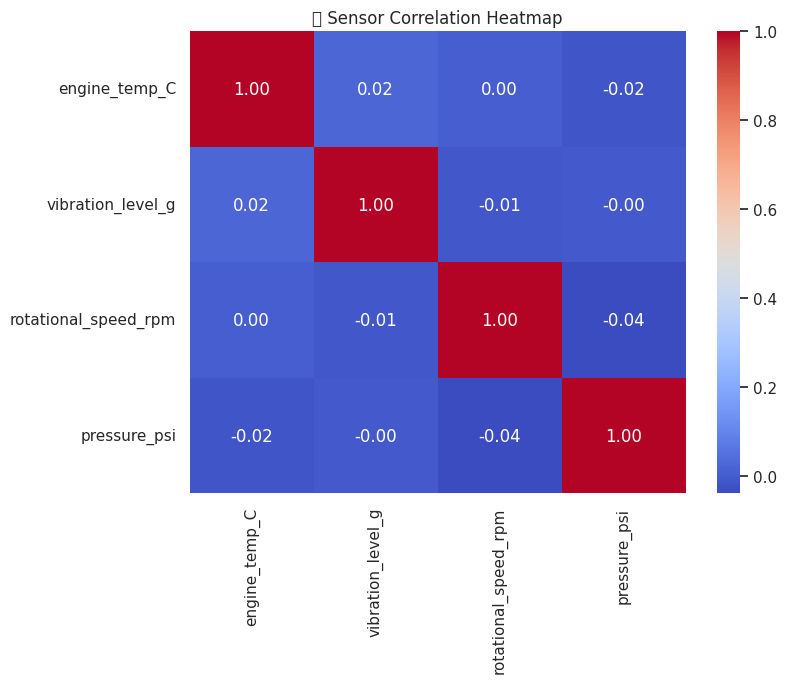

In [ ]:
# Correlation of continuous sensor readings
corr_matrix = df[sensor_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Sensor Correlation Heatmap")
plt.show()


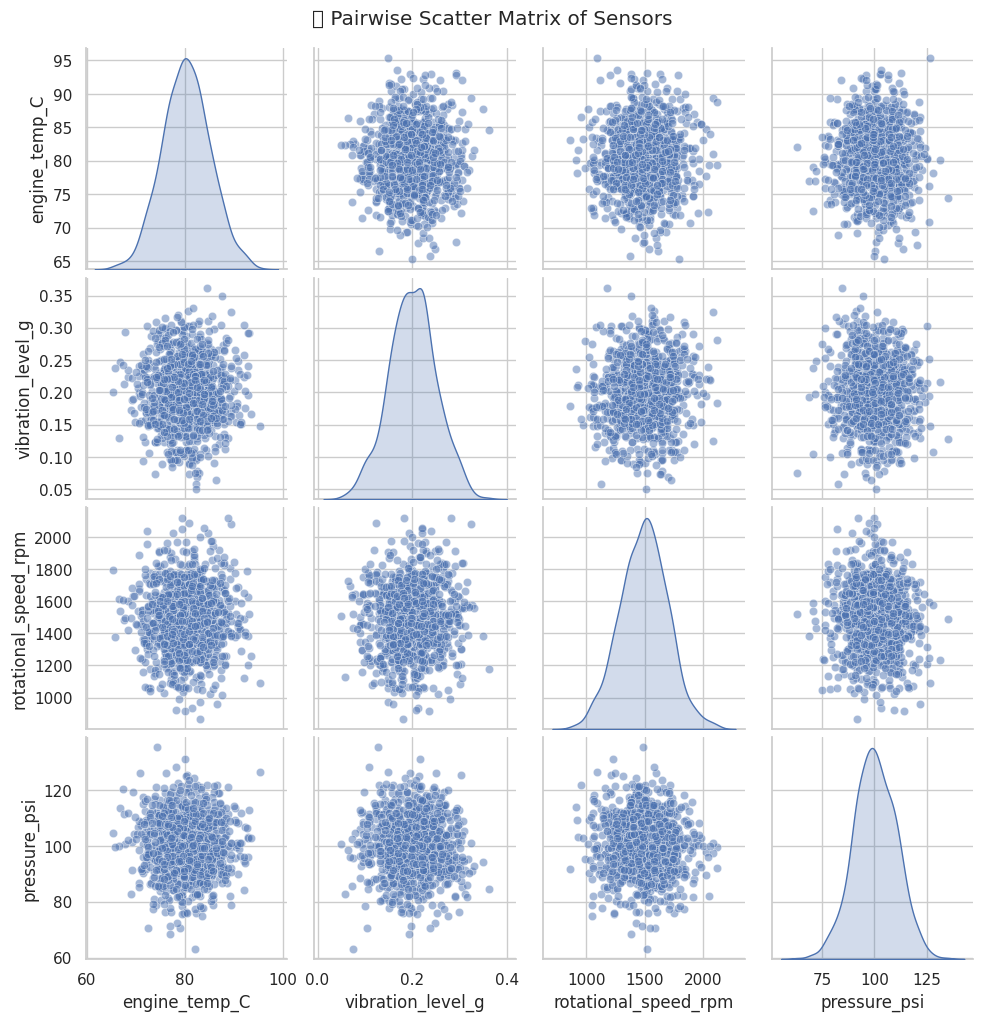

In [ ]:
# Sample a small portion to reduce memory usage
sample_df = df[sensor_cols].sample(1000, random_state=42)
sns.pairplot(sample_df, diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("📊 Pairwise Scatter Matrix of Sensors", y=1.02)
plt.show()


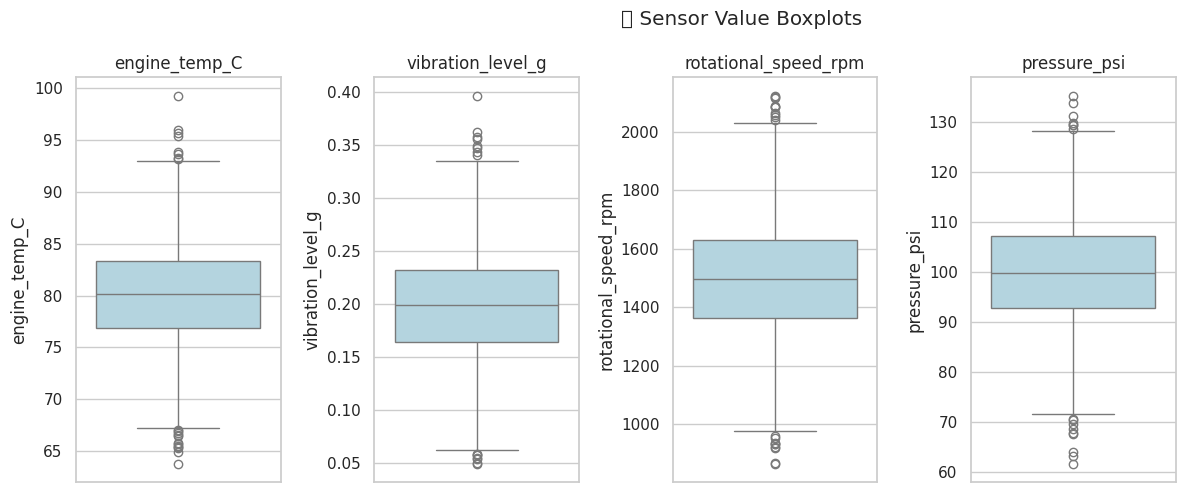

In [ ]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(sensor_cols):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col)
plt.suptitle("📦 Sensor Value Boxplots")
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

Index(['timestamp', 'engine_temp_C', 'vibration_level_g',
       'rotational_speed_rpm', 'pressure_psi', 'ambient_temp_C',
       'component_wear_mm', 'location_lat', 'location_lon', 'anomaly_flag'],
      dtype='object')


Index(['timestamp', 'engine_temp_C', 'vibration_level_g',
       'rotational_speed_rpm', 'pressure_psi', 'ambient_temp_C',
       'component_wear_mm', 'location_lat', 'location_lon', 'anomaly_flag'],
      dtype='object')


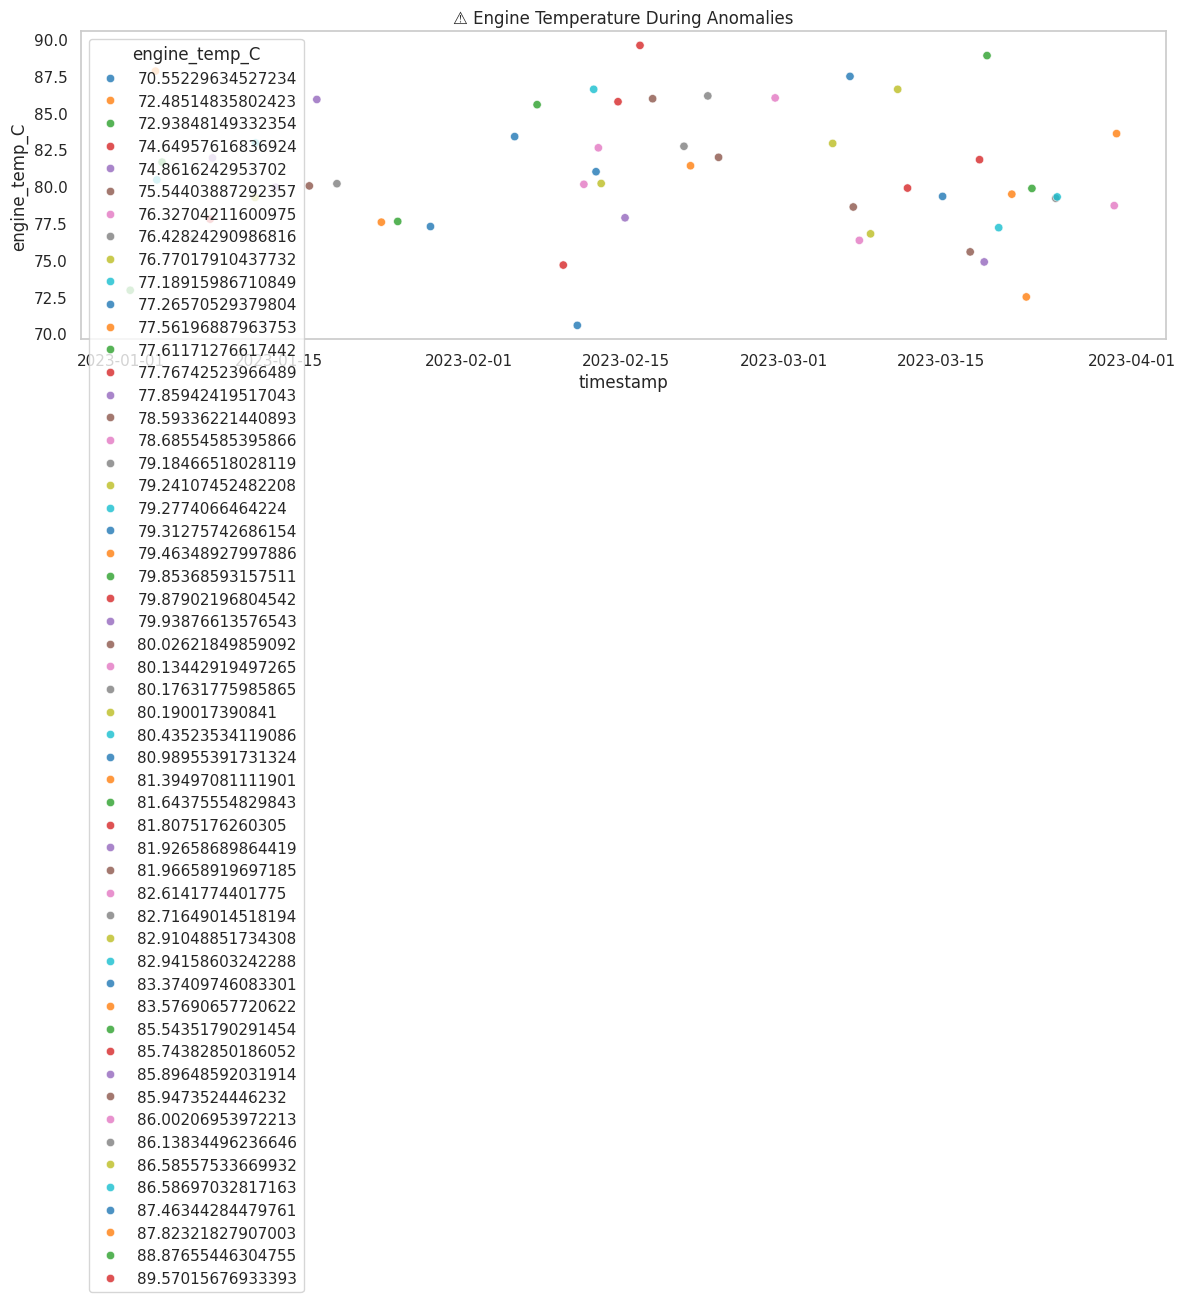

In [ ]:
# Anomalies across time for preview
print(df.columns)
anomalies = df[df["anomaly_flag"] == 1]
plt.figure(figsize=(14, 4))
sns.scatterplot(x="timestamp", y="engine_temp_C", data=anomalies, hue="engine_temp_C", palette="tab10", alpha=0.8)
plt.title("⚠️ Engine Temperature During Anomalies")
plt.grid()
plt.show()


In [ ]:
# Extract time-based components from the timestamp
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["weekday"] = df["timestamp"].dt.weekday
df["month"] = df["timestamp"].dt.month
df["weekofyear"] = df["timestamp"].dt.isocalendar().week

# Cyclical encoding for periodic patterns (e.g., hour of day)
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)
df["day_sin"] = np.sin(2 * np.pi * df["day"] / 31)
df["day_cos"] = np.cos(2 * np.pi * df["day"] / 31)
df["weekday_sin"] = np.sin(2 * np.pi * df["weekday"] / 7)
df["weekday_cos"] = np.cos(2 * np.pi * df["weekday"] / 7)


In [ ]:
# Compute rolling mean, std dev over 24 hours (24 samples)
rolling_features = []

# Check if 'unit_id' exists in the DataFrame columns
if 'unit_id' not in df.columns:
    # If 'unit_id' is not present, assume all data belongs to a single unit
    # and create a temporary 'unit_id' column with a single value
    df['unit_id'] = 1

for col in sensor_cols:
    df[f"{col}_roll_mean_24h"] = df.groupby("unit_id")[col].transform(lambda x: x.rolling(window=24, min_periods=1).mean())
    df[f"{col}_roll_std_24h"] = df.groupby("unit_id")[col].transform(lambda x: x.rolling(window=24, min_periods=1).std())
    rolling_features += [f"{col}_roll_mean_24h", f"{col}_roll_std_24h"]

In [ ]:
# Lag values for each sensor signal (t-1, t-2)
lag_features = []
for col in sensor_cols:
    for lag in [1, 2]:
        df[f"{col}_lag_{lag}"] = df.groupby("unit_id")[col].shift(lag)
        lag_features.append(f"{col}_lag_{lag}")


In [ ]:
# Difference in sensor readings compared to previous timestamp
delta_features = []
for col in sensor_cols:
    df[f"{col}_delta"] = df.groupby("unit_id")[col].diff()
    delta_features.append(f"{col}_delta")


In [ ]:
# Create interaction terms between key sensors
df["vibration_rpm"] = df["vibration_level_g"] * df["rotational_speed_rpm"]
df["temp_pressure"] = df["engine_temp_C"] * df["pressure_psi"]

# Check if 'flow_rate_m3h' column exists before creating 'flow_vib'
if 'flow_rate_m3h' in df.columns:
    df["flow_vib"] = df["flow_rate_m3h"] * df["vibration_level_g"]
else:
    print("Warning: 'flow_rate_m3h' column not found. Skipping 'flow_vib' calculation.")

In [ ]:
engineered_columns = [col for col in df.columns if (
    "_roll_" in col or
    "_lag_" in col or
    "_delta" in col or
    "_sin" in col or
    "_cos" in col or
    "vibration_rpm" in col or
    "temp_pressure" in col or
    "pressure_per_rpm" in col
)]

print("✅ Number of new engineered features:", len(engineered_columns))
df[engineered_columns].describe().T.head(10)


✅ Number of new engineered features: 29


,count,mean,std,min,25%,50%,75%,max
hour_sin,2160.0,-1.809252e-17,0.707271,-1.000000,-0.707107,6.123234e-17,0.707107,1.000000
hour_cos,2160.0,-5.509996e-17,0.707271,-1.000000,-0.707107,-6.123234e-17,0.707107,1.000000
day_sin,2160.0,6.618382e-03,0.717414,-0.998717,-0.724793,5.058416e-02,0.724793,0.998717
day_cos,2160.0,-3.220542e-02,0.696203,-0.994869,-0.758758,-5.064917e-02,0.688967,1.000000
weekday_sin,2160.0,1.083253e-02,0.703638,-0.974928,-0.781831,0.000000e+00,0.781831,0.974928
weekday_cos,2160.0,2.472455e-03,0.710798,-0.900969,-0.900969,-2.225209e-01,0.623490,1.000000
engine_temp_C_roll_mean_24h,2160.0,8.018901e+01,0.988611,77.574899,79.493709,8.019063e+01,80.882818,83.428497
engine_temp_C_roll_std_24h,2159.0,4.881553e+00,0.708657,2.085378,4.396416,4.885874e+00,5.361546,7.444635
vibration_level_g_roll_mean_24h,2160.0,1.991996e-01,0.010715,0.144427,0.192271,1.998491e-01,0.206389,0.226902
vibration_level_g_roll_std_24h,2159.0,4.984912e-02,0.007384,0.027296,0.044706,4.996258e-02,0.054700,0.073133


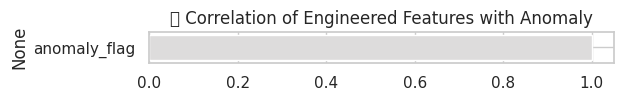

In [ ]:
# Correlation of new features with anomaly labels
corrs = df[engineered_columns + ["anomaly_flag"]].corr()["anomaly_flag"].sort_values(ascending=False)
top_corrs = corrs[abs(corrs) > 0.2]

plt.figure(figsize=(6, len(top_corrs)*0.4))
sns.barplot(x=top_corrs.values, y=top_corrs.index, palette="coolwarm")
plt.title("📌 Correlation of Engineered Features with Anomaly")
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import zscore

# Z-score of engine temp and vibration
df["z_temp"] = df.groupby("unit_id")["engine_temp_C"].transform(zscore)
df["z_vibration"] = df.groupby("unit_id")["vibration_level_g"].transform(zscore)

# Mark as anomaly if Z-score exceeds a threshold
z_thresh = 3.0
df["anomaly_z"] = ((df["z_temp"].abs() > z_thresh) | (df["z_vibration"].abs() > z_thresh)).astype(int)

print("Anomalies Detected by Z-Score:", df["anomaly_z"].sum())


Anomalies Detected by Z-Score: 11


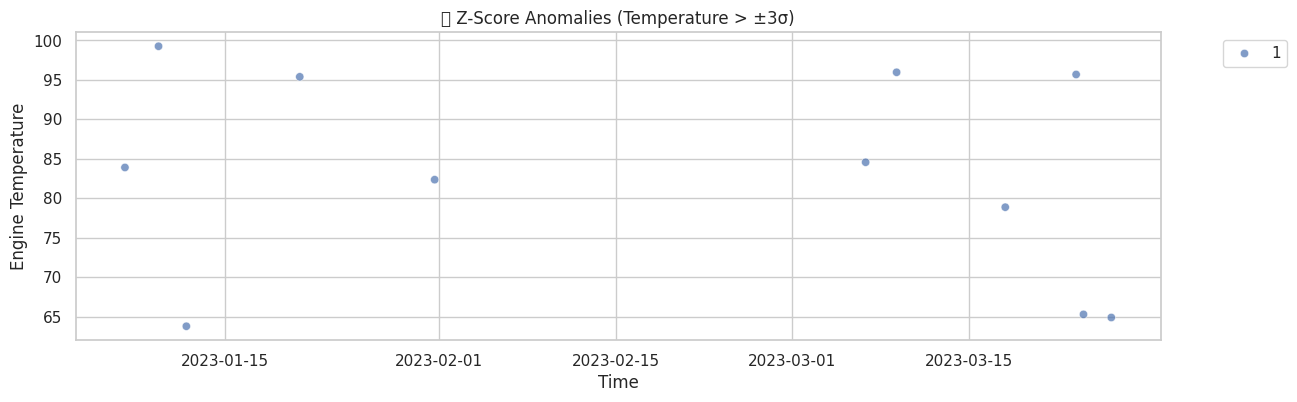

In [ ]:
# Visualize Z-score anomalies
plt.figure(figsize=(14, 4))
sns.scatterplot(data=df[df["anomaly_z"] == 1], x="timestamp", y="engine_temp_C", hue="unit_id", alpha=0.7)
plt.title("🔥 Z-Score Anomalies (Temperature > ±3σ)")
plt.xlabel("Time")
plt.ylabel("Engine Temperature")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Features to use in model
features_for_iforest = [
    "engine_temp_C", "vibration_level_g", "pressure_psi", "rotational_speed_rpm"
] + engineered_columns

# Drop rows with NaNs due to rolling/lag features
df_ml = df.dropna(subset=features_for_iforest)

# Fit isolation forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_ml["anomaly_iso"] = iso_forest.fit_predict(df_ml[features_for_iforest])
df_ml["anomaly_iso"] = df_ml["anomaly_iso"].map({-1: 1, 1: 0})

print("Anomalies Detected by Isolation Forest:", df_ml["anomaly_iso"].sum())


Anomalies Detected by Isolation Forest: 22


In [ ]:
# Cross-tabulate both methods
compare = df_ml[["anomaly_z", "anomaly_iso"]].value_counts().unstack()
compare.columns = ["Normal (IForest)", "Anomaly (IForest)"]
compare.index = ["Normal (Z-score)", "Anomaly (Z-score)"]
compare


,Normal (IForest),Anomaly (IForest)
Normal (Z-score),2127,20
Anomaly (Z-score),9,2


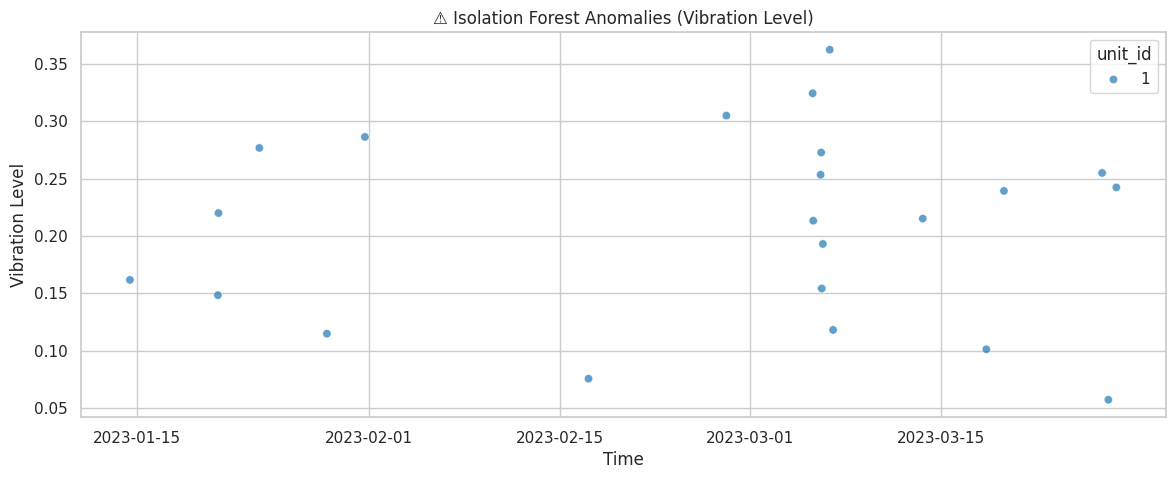

In [ ]:
# Scatter anomaly detection by Isolation Forest
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_ml[df_ml["anomaly_iso"] == 1],
                x="timestamp", y="vibration_level_g", hue="unit_id", alpha=0.7, palette="tab10")
plt.title("⚠️ Isolation Forest Anomalies (Vibration Level)")
plt.xlabel("Time")
plt.ylabel("Vibration Level")
plt.grid(True)
plt.show()


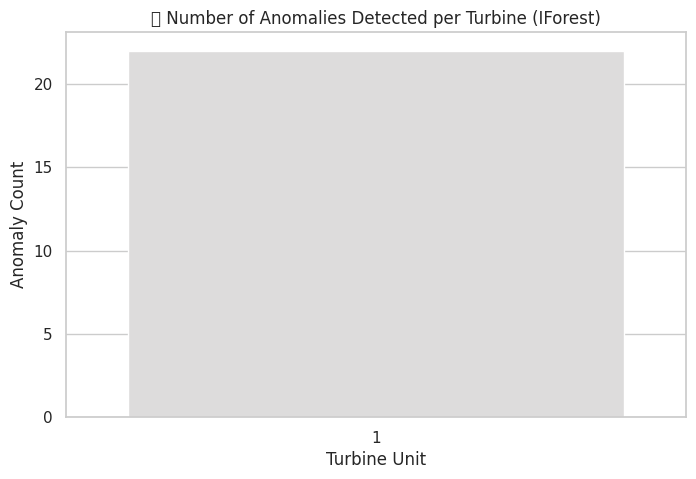

In [ ]:
# Count anomalies per turbine
anomaly_counts = df_ml[df_ml["anomaly_iso"] == 1].groupby("unit_id").size()

plt.figure(figsize=(8, 5))
sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values, palette="coolwarm")
plt.title("🚨 Number of Anomalies Detected per Turbine (IForest)")
plt.xlabel("Turbine Unit")
plt.ylabel("Anomaly Count")
plt.show()


In [ ]:
# Combine both models for stronger label
df_ml["anomaly_final"] = ((df_ml["anomaly_z"] == 1) & (df_ml["anomaly_iso"] == 1)).astype(int)

# Preview sample of final anomalies
df_ml[df_ml["anomaly_final"] == 1][["timestamp", "unit_id", "engine_temp_C", "vibration_level_g"]].head()


,timestamp,unit_id,engine_temp_C,vibration_level_g
478,2023-01-20 22:00:00,1,95.394404,0.148374
1556,2023-03-06 20:00:00,1,84.567923,0.362155


In [ ]:
# Use the ML-cleaned dataset with engineered features and dropped NAs
reg_df = df_ml.copy()

# Define feature columns (we exclude raw time & label columns)
regression_features = features_for_iforest

# Targets
target_linear = "engine_temp_C"
target_logistic = "anomaly_final"


In [ ]:
from sklearn.model_selection import train_test_split

X_lin = reg_df[regression_features]
y_lin = reg_df[target_linear]

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)

print("🔧 Model Coefficients:")
for f, c in zip(X_train_lin.columns, lin_reg.coef_):
    print(f"{f}: {c:.4f}")


🔧 Model Coefficients:
engine_temp_C: 0.6667
vibration_level_g: 0.0000
pressure_psi: -0.0000
rotational_speed_rpm: -0.0000
hour_sin: -0.0000
hour_cos: -0.0000
day_sin: -0.0000
day_cos: -0.0000
weekday_sin: 0.0000
weekday_cos: 0.0000
engine_temp_C_roll_mean_24h: -0.0000
engine_temp_C_roll_std_24h: 0.0000
vibration_level_g_roll_mean_24h: -0.0000
vibration_level_g_roll_std_24h: -0.0000
rotational_speed_rpm_roll_mean_24h: 0.0000
rotational_speed_rpm_roll_std_24h: -0.0000
pressure_psi_roll_mean_24h: -0.0000
pressure_psi_roll_std_24h: 0.0000
engine_temp_C_lag_1: 0.3333
engine_temp_C_lag_2: -0.0000
vibration_level_g_lag_1: 0.0000
vibration_level_g_lag_2: 0.0000
rotational_speed_rpm_lag_1: 0.0000
rotational_speed_rpm_lag_2: 0.0000
pressure_psi_lag_1: 0.0000
pressure_psi_lag_2: -0.0000
engine_temp_C_delta: 0.3333
vibration_level_g_delta: 0.0000
rotational_speed_rpm_delta: 0.0000
pressure_psi_delta: 0.0000
vibration_rpm: 0.0000
temp_pressure: 0.0000
pressure_per_rpm: -0.0000


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_lin = lin_reg.predict(X_test_lin)

mae = mean_absolute_error(y_test_lin, y_pred_lin)
# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mean_squared_error(y_test_lin, y_pred_lin))
r2 = r2_score(y_test_lin, y_pred_lin)

print(f"📊 MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

📊 MAE: 0.00, RMSE: 0.00, R²: 1.00


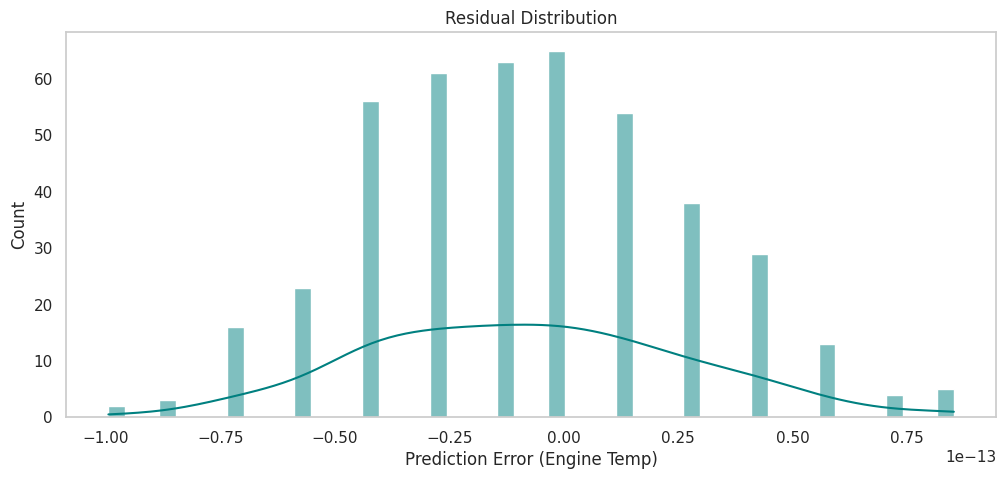

In [ ]:
residuals = y_test_lin - y_pred_lin

plt.figure(figsize=(12, 5))
sns.histplot(residuals, bins=50, kde=True, color='teal')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Engine Temp)")
plt.grid()
plt.show()


In [ ]:
X_log = reg_df[regression_features]
y_log = reg_df[target_logistic]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_log, y_train_log)


LogisticRegression(max_iter=500)

✅ Accuracy: 1.00, ROC AUC: 0.59

🧾 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.00      0.00      0.00         1

    accuracy                           1.00       432
   macro avg       0.50      0.50      0.50       432
weighted avg       1.00      1.00      1.00       432



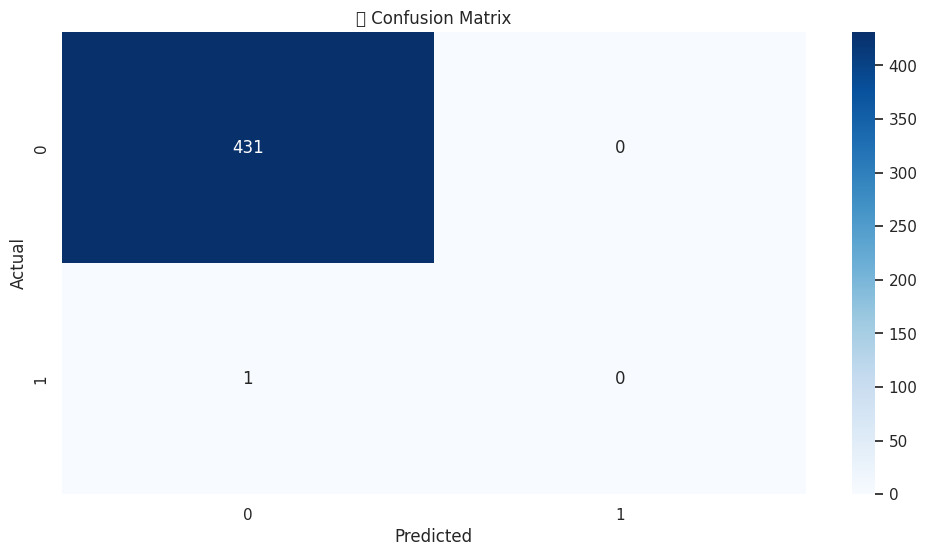

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y_pred_log = log_model.predict(X_test_log)
y_prob_log = log_model.predict_proba(X_test_log)[:, 1]

acc = accuracy_score(y_test_log, y_pred_log)
roc = roc_auc_score(y_test_log, y_prob_log)

print(f"✅ Accuracy: {acc:.2f}, ROC AUC: {roc:.2f}")
print("\n🧾 Classification Report:")
print(classification_report(y_test_log, y_pred_log))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test_log, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


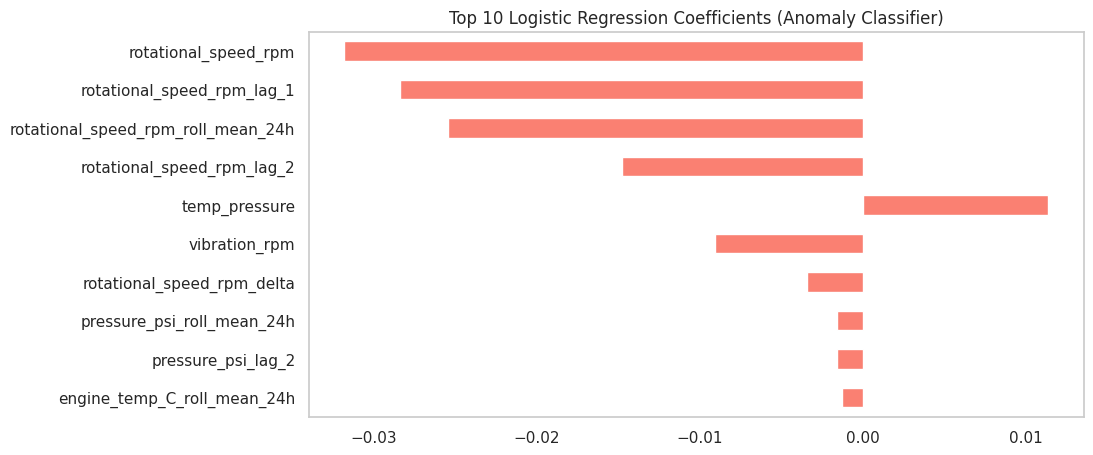

In [ ]:
# Sort and plot top logistic coefficients
coeffs = pd.Series(log_model.coef_[0], index=X_train_log.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 5))
coeffs.head(10).plot(kind='barh', color='salmon')
plt.title("Top 10 Logistic Regression Coefficients (Anomaly Classifier)")
plt.gca().invert_yaxis()
plt.grid()
plt.show()


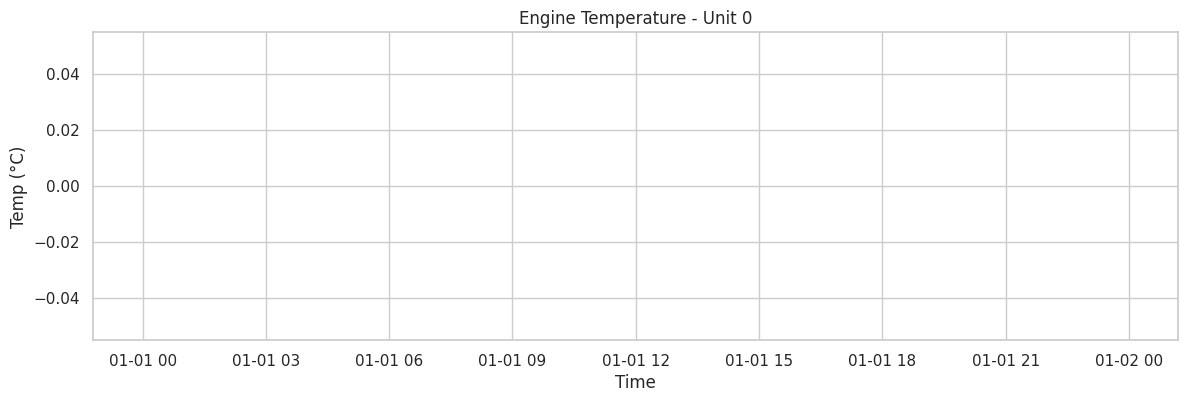

In [ ]:
unit_df = df[df["unit_id"] == 0][["timestamp", "engine_temp_C"]].dropna().copy()
unit_df = unit_df.set_index("timestamp").resample("1H").mean().interpolate()

plt.figure(figsize=(14, 4))
plt.plot(unit_df.index, unit_df["engine_temp_C"])
plt.title("Engine Temperature - Unit 0")
plt.xlabel("Time")
plt.ylabel("Temp (°C)")
plt.grid(True)
plt.show()


In [ ]:
from prophet import Prophet

prophet_df = unit_df.reset_index().rename(columns={"timestamp": "ds", "engine_temp_C": "y"})

# Split for training (90%)
train_size = int(len(prophet_df) * 0.9)
prophet_train = prophet_df[:train_size]
prophet_test = prophet_df[train_size:]


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


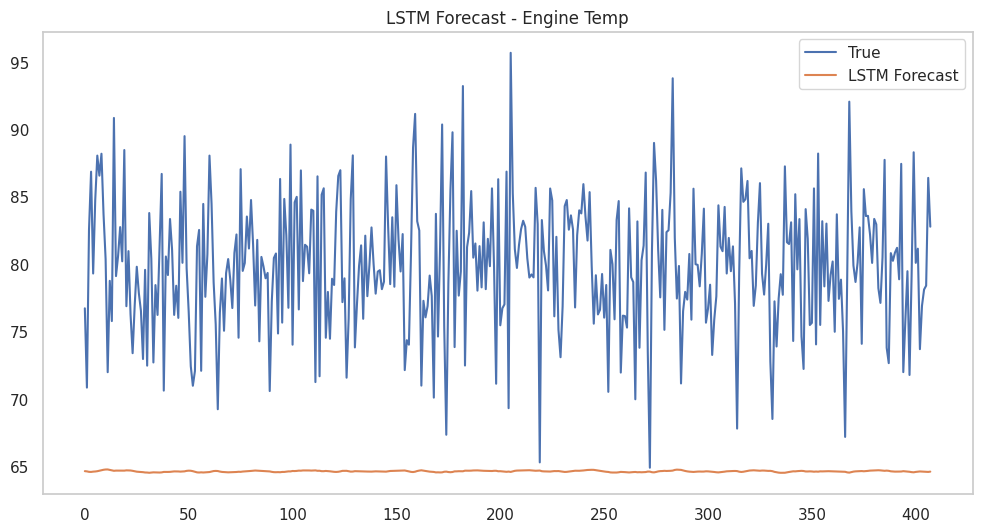

LSTM RMSE: 15.985478491318034


In [ ]:
# Make predictions
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_true_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Evaluate the model and plot results
plt.plot(y_true_lstm, label="True")
plt.plot(y_pred_lstm, label="LSTM Forecast")
plt.legend()
plt.title("LSTM Forecast - Engine Temp")
plt.grid()
plt.show()

# Calculate RMSE manually or using numpy
rmse = np.sqrt(mean_squared_error(y_true_lstm, y_pred_lstm))
# Or, calculate RMSE using sklearn (older versions)
# rmse = np.sqrt(mean_squared_error(y_true_lstm, y_pred_lstm))
print("LSTM RMSE:", rmse)

In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn \
             dask statsmodels prophet xgboost \
             torch torchvision torchaudio \
             geopandas folium streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual ngrok authtoken
ngrok.set_auth_token("2wTphNhxNpyGPT7qttDfzwTpuXR_5zs4XdYNvvb3mPJNuvCGB")


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX

import dask.dataframe as dd
import geopandas as gpd
import folium

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO

import warnings
warnings.filterwarnings("ignore")

# Set aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

st.title("Mechanical Time Series and Anomaly Detection Forecasting")

# Load dataset
st.header("Load Dataset")
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file, parse_dates=["timestamp"])
    df.sort_values("timestamp", inplace=True)
    df.reset_index(drop=True, inplace=True)
    st.write("DataFrame shape:", df.shape)
    st.dataframe(df.head())

    # Continue with data preprocessing, visualization, and modeling as per your project
    # ...
else:
    st.warning("Please upload a CSV file to proceed.")


Overwriting app.py


In [ ]:
import subprocess

# Run Streamlit app in the background
process = subprocess.Popen(["streamlit", "run", "app.py"])


In [ ]:
import os
print(os.path.exists("app.py"))  # Should return True


True


In [ ]:
!pkill streamlit


In [ ]:
!streamlit run your_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: your_app.py


In [ ]:
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual ngrok authtoken
ngrok.set_auth_token("2wTphNhxNpyGPT7qttDfzwTpuXR_5zs4XdYNvvb3mPJNuvCGB")  # Replace with the new authtoken
!streamlit run app.py
public_url = ngrok.connect(8501)
print(f"✅ Public URL: {public_url}")




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.50.65:8501

  Stopping...
^C
✅ Public URL: NgrokTunnel: "https://438b-34-42-50-65.ngrok-free.app" -> "http://localhost:8501"
